**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline

In [2]:
df = pd.read_csv("boston_housing.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

### Task 2: Generate Descriptive Statistics and Visualizations

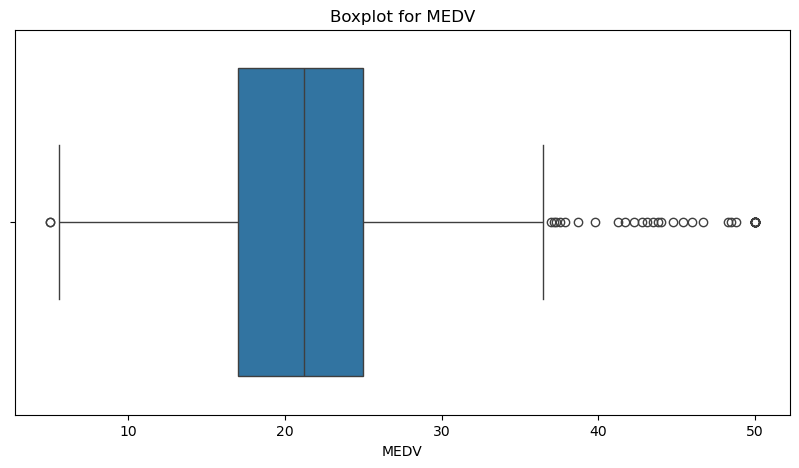

In [7]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

Note: Outliers after third quartile.

C:\Users\NT\AppData\Local\Temp\ipykernel_8412\2843997382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.CHAS,bins=10, kde=False)


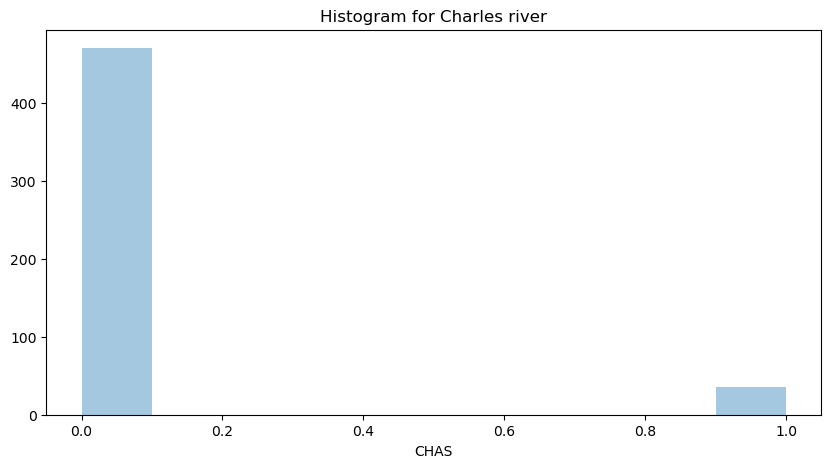

In [8]:
#Provide a histogram for the Charles river variable
plt.figure(figsize=(10,5))
sns.distplot(a=df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

Note: Majority tracts don't bound Charles River

In [9]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,70 years and older


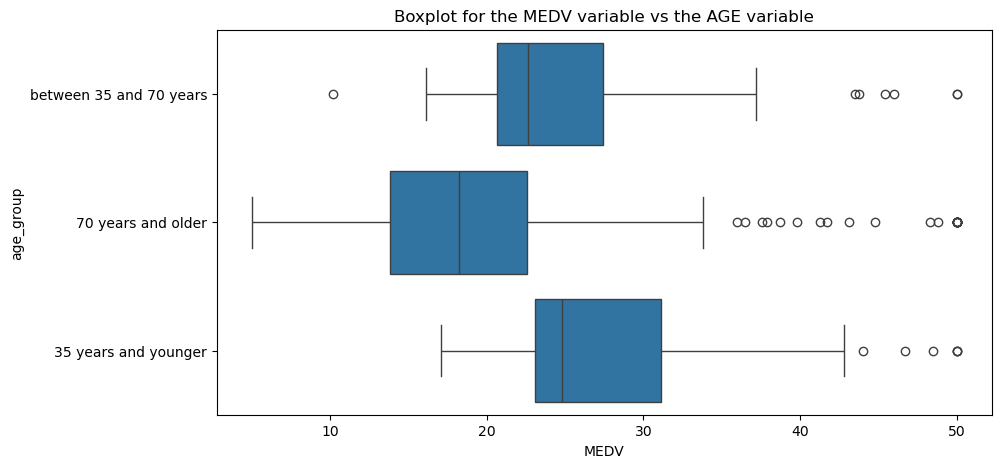

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV, y=df.age_group, data=df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

Note: 35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses

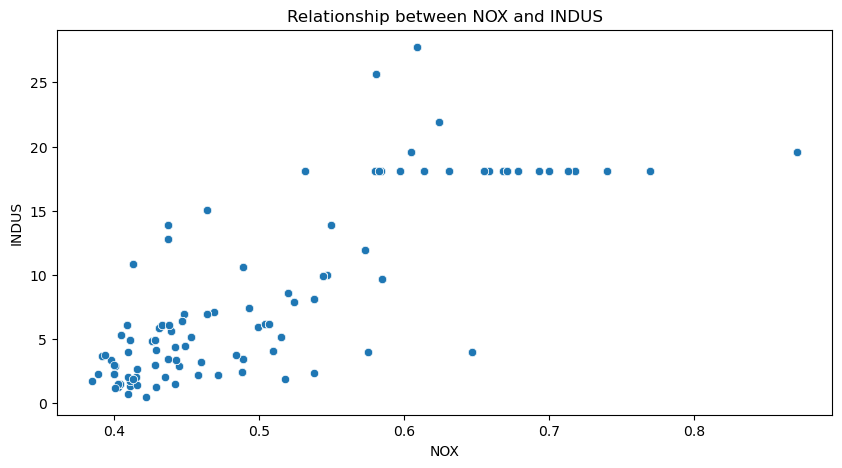

In [12]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

Note: There seems to be a linear relationship till NOX=0.6

C:\Users\NT\AppData\Local\Temp\ipykernel_8412\2834377710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.PTRATIO,bins=10, kde=False)


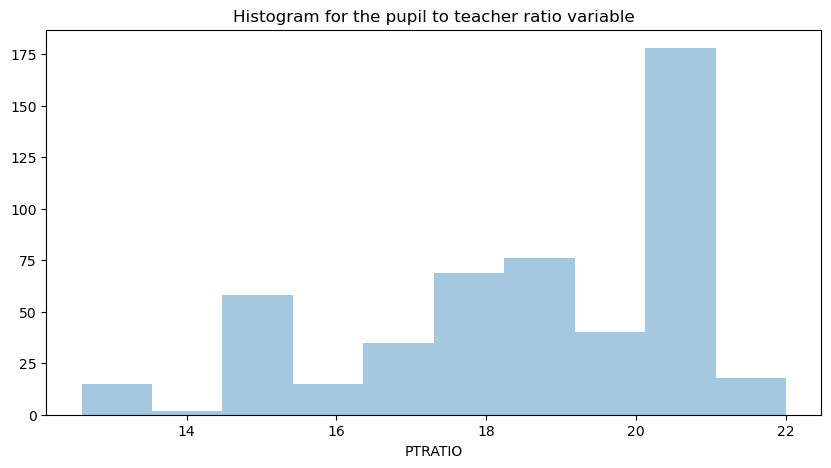

In [13]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.distplot(a=df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

Note: Pupil to teacher ratio is highest at 20-21 range.

### Task 3: Use the appropriate tests to answer the questions provided

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis($H_0$): Both average MEDV are the same

Alternative Hypothesis($H_1$): Both average MEDV are NOT the same

In [14]:
df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [15]:
scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'],df[df['CHAS'] == 1]['MEDV'],axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than the alpha value 0.05, we reject the null hypothesis since statistical significance exists.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
df["AGE"].value_counts()

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


In [17]:
low = df[df["age_group"] == '35 years and younger']["MEDV"]
mid = df[df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = df[df["age_group"] == '70 years and older']["MEDV"]

In [18]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

In [19]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since the p-value is less than the alpha value of 0.05, we reject the null hypothesis because of statistical significance.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

-   $H_0:$ NOX is not correlated with INDUS

-   $H_1:$ NOX is correlated with INDUS


In [20]:
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])

In [21]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.763651446920915, P-value=7.913361061241167e-98


Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State Hypothesis

Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value

In [22]:
y = df['MEDV']
x = df['DIS']

In [23]:
x = sm.add_constant(x)

In [24]:
results = sm.OLS(y,x).fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        11:49:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
np.sqrt(0.062)  ##Pearson Coeffiecent valuea

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features